# **Pls refer this code**

https://www.kaggle.com/code/siddharthkumar25/detect-malicious-url-using-ml/notebook

In [1]:
# Import libraries

import re
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset 1

data1 = pd.read_csv("malicious_phish.csv")
data1.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [4]:
# Show the types of URL in Dataset 1

unique_classes_1 = data1['type'].unique()
print(unique_classes_1)

['phishing' 'benign' 'defacement' 'malware']


In [5]:
# Load dataset 2

data2 = pd.read_csv("phishing_site_urls.csv")
data2.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
# Show the types of URL in Dataset 2

unique_classes_2 = data2['Label'].unique()
print(unique_classes_2)

['bad' 'good']


### **Data preprocessing**

Data cleaning

In [8]:
# Check for null values in Dataset 1
null_values_1 = data1.isnull().sum()

# Print the columns with null values (if any) and their respective counts
print(null_values_1)

url     0
type    0
dtype: int64


In [9]:
# Check for null values in Dataset 2
null_values_2 = data2.isnull().sum()

# Print the columns with null values (if any) and their respective counts
print(null_values_2)

URL      0
Label    0
dtype: int64


In [10]:
# Check for duplicate rows in Dataset 1
duplicate_rows_1 = data1[data1.duplicated()]

# Print the duplicate rows (if any)
print(duplicate_rows_1)

                                                      url        type
876     http://9779.info/%E4%BA%94%E8%B0%B7%E6%9D%82%E...     malware
1361    http://portal.dddgaming.com/docs/rules/15022/c...     malware
1822    http://www.824555.com/app/member/SportOption.p...     malware
1989    http://chinacxyy.com/newscodejs.asp?lm2=201&li...     malware
2963    http://www.bruynzeelmultipanel.be/index.php?op...  defacement
...                                                   ...         ...
535215       http://www.habbocreditosparati.blogspot.com/    phishing
535217  http://mundovirtualhabbo.blogspot.com/2009_01_...    phishing
535218  http://aijcs.blogspot.com/2005/03/colourful-li...    phishing
590597                             bin/webscr?cmd=_login-      benign
600368  'www.allegropl.xaa.pl/enter_login.html?session...      benign

[10066 rows x 2 columns]


In [11]:
# Remove duplicate rows from Dataset 1
data1 = data1.drop_duplicates()

# Verify that duplicates are removed by checking the shape of the DataFrame
print(data1.shape)

(641125, 2)


In [12]:
# Check for duplicate rows in Dataset 2
duplicate_rows_2 = data2[data2.duplicated()]

# Print the duplicate rows (if any)
print(duplicate_rows_2)

                                                      URL Label
35413                              bin/webscr?cmd=_login-   bad
45184   'www.allegropl.xaa.pl/enter_login.html?session...   bad
96132                       stormpages.com/script/PHP.txt   bad
96449          penwithian.co.uk/hyperventilate/sporran.js   bad
96480                            ukonline.hc0.me/Host.exe   bad
...                                                   ...   ...
549341                                    23.227.196.215/   bad
549342                                 apple-checker.org/   bad
549343                                  apple-iclods.org/   bad
549344                                 apple-uptoday.org/   bad
549345                                  apple-search.info   bad

[42150 rows x 2 columns]


In [13]:
# Remove duplicate rows from Dataset 2
data2 = data2.drop_duplicates()

# Verify that duplicates are removed by checking the shape of the DataFrame
print(data2.shape)

(507196, 2)


Determining Imbalance data

In [14]:
# Check the distribution of classes in the "type" column for Dataset 1
class_distribution_1 = data1['type'].value_counts()

# Print the class distribution
print(class_distribution_1)

type
benign        428080
defacement     95308
phishing       94092
malware        23645
Name: count, dtype: int64


In [15]:
# Calculate the class distribution as a percentage for Dataset 1
class_distribution_percentage_1 = (data1['type'].value_counts() / len(data1)) * 100

# Print the class distribution as a percentage
print(class_distribution_percentage_1)

type
benign        66.770131
defacement    14.865744
phishing      14.676077
malware        3.688048
Name: count, dtype: float64


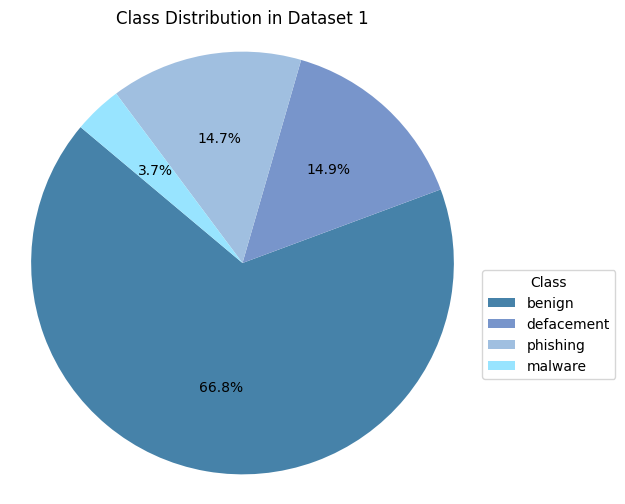

In [16]:
custom_colors = ['#4682A9', '#7895CB', '#A0BFE0' ,'#98E4FF']

# Create a pie chart for Dataset 1
plt.figure(figsize=(6, 6))
plt.pie(class_distribution_1, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Class Distribution in Dataset 1')

# Create a legend
plt.legend(title='Class', labels=class_distribution_1.index, loc='best', bbox_to_anchor=(1, 0.5))

plt.axis('equal') 
plt.show()

In [17]:
# Check the distribution of classes in the "Label" column for Dataset 2
class_distribution_2 = data2['Label'].value_counts()

# Print the class distribution
print(class_distribution_2)

Label
good    392897
bad     114299
Name: count, dtype: int64


In [18]:
# Calculate the class distribution as a percentage for Dataset 2
class_distribution_percentage_2 = (data2['Label'].value_counts() / len(data2)) * 100

# Print the class distribution as a percentage
print(class_distribution_percentage_2)

Label
good    77.46453
bad     22.53547
Name: count, dtype: float64


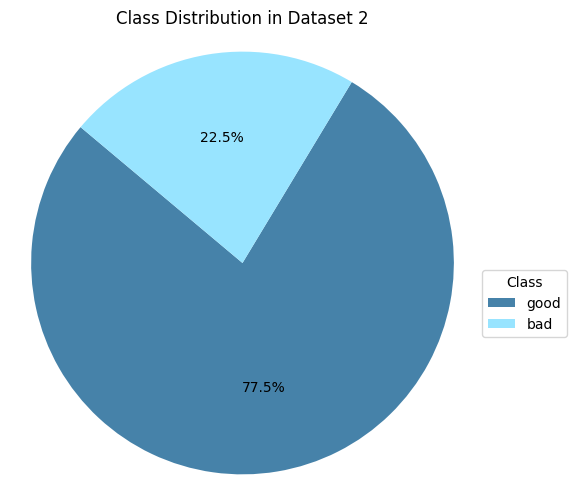

In [19]:
custom_colors = ['#4682A9', '#98E4FF']

# Create a pie chart for Dataset 2
plt.figure(figsize=(6, 6))
plt.pie(class_distribution_2, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Class Distribution in Dataset 2')

# Create a legend
plt.legend(title='Class', labels=class_distribution_2.index, loc='best', bbox_to_anchor=(1, 0.5))

plt.axis('equal')
plt.show()

Label Encoding

In [20]:
# Create a mapping of encoded values to class names for Dataset 1
encoded_to_class_1 = {'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3}

# Map the 'type_encoded' column to class names
data1['type_encoded'] = data1['type'].map(encoded_to_class_1)

# Display the DataFrame with the 'type' column removed
data1 = data1.drop(columns=['type'])

# Rename the 'type_encoded' column to 'type'
data1.rename(columns={'type_encoded': 'type'}, inplace=True)

# Print the updated Dataset 1
print(data1)

                                                      url  type
0                                        br-icloud.com.br     2
1                     mp3raid.com/music/krizz_kaliko.html     0
2                         bopsecrets.org/rexroth/cr/1.htm     0
3       http://www.garage-pirenne.be/index.php?option=...     1
4       http://adventure-nicaragua.net/index.php?optio...     1
...                                                   ...   ...
651186            xbox360.ign.com/objects/850/850402.html     2
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/     2
651188         www.gamespot.com/xbox360/action/deadspace/     2
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)     2
651190          www.angelfire.com/goth/devilmaycrytonite/     2

[641125 rows x 2 columns]


In [21]:
# Get the counts for each class in the 'type' column in Dataset 1
class_counts_1 = data1['type'].value_counts()

# Print the class counts
print(class_counts_1)

type
0    428080
1     95308
2     94092
3     23645
Name: count, dtype: int64


In [22]:
# Create a mapping of encoded values to class names for Dataset 2
encoded_to_class_2 = {'good': 0, 'bad': 1}

# Map the 'type_encoded' column to class names
data2['type_encoded'] = data2['Label'].map(encoded_to_class_2)

# Display the DataFrame with the 'Label' column removed
data2 = data2.drop(columns=['Label'])

# Rename the 'type_encoded' column to 'Label'
data2.rename(columns={'type_encoded': 'Label'}, inplace=True)

# Print the updated Dataset 2
print(data2)

                                                      URL  Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...      1
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      1
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....      1
3       mail.printakid.com/www.online.americanexpress....      1
4       thewhiskeydregs.com/wp-content/themes/widescre...      1
...                                                   ...    ...
516466                                    23.227.196.215/      1
516467                                 apple-checker.org/      1
516468                                  apple-iclods.org/      1
516469                                 apple-uptoday.org/      1
516470                                  apple-search.info      1

[507196 rows x 2 columns]


In [23]:
# Get the counts for each class in the 'Label' column in Dataset 2
class_counts_2 = data2['Label'].value_counts()

# Print the class counts
print(class_counts_2)

Label
0    392897
1    114299
Name: count, dtype: int64


### Feature Extraction


### 1. Length Feature:

In [25]:
# Importing dependencies
!pip install tld
!pip install tldextract

In [24]:
from urllib.parse import urlparse
import tldextract
from tld import get_tld
import os.path

In [25]:
# Length of URL
data1['url_length'] = data1['url'].apply(lambda i: len(str(i)))
data2['url_length'] = data2['URL'].apply(lambda i: len(str(i)))

In [26]:
# Hostname Length
data1['hostname'] = data1['url'].apply(lambda url: tldextract.extract(url).domain)
data1['hostname_length'] = data1['hostname'].apply(len)

data2['hostname'] = data2['URL'].apply(lambda url: tldextract.extract(url).domain)
data2['hostname_length'] = data2['hostname'].apply(len)

In [27]:
# Path Length
data1['path_length'] = data1['url'].apply(lambda i: len(urlparse(i).path))
data2['path_length'] = data2['URL'].apply(lambda i: len(urlparse(i).path))

In [28]:
# First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

data1['fd_length'] = data1['url'].apply(lambda i: fd_length(i))
data2['fd_length'] = data2['URL'].apply(lambda i: fd_length(i))

In [29]:
# Length of Top Level Domain
data1['tld'] = data1['url'].apply(lambda i: get_tld(i,fail_silently=True))
data2['tld'] = data2['URL'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

data1['tld_length'] = data1['tld'].apply(lambda i: tld_length(i))
data2['tld_length'] = data2['tld'].apply(lambda i: tld_length(i))

In [30]:
# Dataset after extracting length features - only want length features, so remove "tld" and "hostname"
data1 = data1.drop("tld", axis=1)
data1 = data1.drop("hostname", axis=1)
data2 = data2.drop("tld", axis=1)
data2 = data2.drop("hostname", axis=1)

In [31]:
data1.head()

,url,type,url_length,hostname_length,path_length,fd_length,tld_length
0,br-icloud.com.br,2,16,9,16,0,-1
1,mp3raid.com/music/krizz_kaliko.html,0,35,7,35,5,-1
2,bopsecrets.org/rexroth/cr/1.htm,0,31,10,31,7,-1
3,http://www.garage-pirenne.be/index.php?option=...,1,88,14,10,9,2
4,http://adventure-nicaragua.net/index.php?optio...,1,235,19,10,9,3


In [32]:
data2.head()

,URL,Label,url_length,hostname_length,path_length,fd_length,tld_length
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,225,6,134,35,-1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,81,7,81,12,-1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,177,12,177,76,-1
3,mail.printakid.com/www.online.americanexpress....,1,60,9,60,30,-1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,116,15,79,10,-1


### 2. Count Features:

In [33]:
# Count -

data1['count-'] = data1['url'].apply(lambda i: i.count('-'))
data2['count-'] = data2['URL'].apply(lambda i: i.count('-'))

In [34]:
# Count @

data1['count@'] = data1['url'].apply(lambda i: i.count('@'))
data2['count@'] = data2['URL'].apply(lambda i: i.count('@'))

In [35]:
# Count ?

data1['count?'] = data1['url'].apply(lambda i: i.count('?'))
data2['count?'] = data2['URL'].apply(lambda i: i.count('?'))

In [36]:
# Count %

data1['count%'] = data1['url'].apply(lambda i: i.count('%'))
data2['count%'] = data2['URL'].apply(lambda i: i.count('%'))

In [37]:
# Count .

data1['count.'] = data1['url'].apply(lambda i: i.count('.'))
data2['count.'] = data2['URL'].apply(lambda i: i.count('.'))

In [38]:
# Count =

data1['count='] = data1['url'].apply(lambda i: i.count('='))
data2['count='] = data2['URL'].apply(lambda i: i.count('='))

In [39]:
# Count http

data1['count-http'] = data1['url'].apply(lambda i : i.count('http'))
data2['count-http'] = data2['URL'].apply(lambda i : i.count('http'))

In [40]:
# Count https

data1['count-https'] = data1['url'].apply(lambda i : i.count('https'))
data2['count-https'] = data2['URL'].apply(lambda i : i.count('https'))

In [41]:
# Count www

data1['count-www'] = data1['url'].apply(lambda i: i.count('www'))
data2['count-www'] = data2['URL'].apply(lambda i: i.count('www'))

In [42]:
# Count digits

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

data1['count-digits']= data1['url'].apply(lambda i: digit_count(i))
data2['count-digits']= data2['URL'].apply(lambda i: digit_count(i))

In [43]:
# Count letters

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

data1['count-letters']= data1['url'].apply(lambda i: letter_count(i))
data2['count-letters']= data2['URL'].apply(lambda i: letter_count(i))

In [44]:
# Count number of directories

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

data1['count_dir'] = data1['url'].apply(lambda i: no_of_dir(i))
data2['count_dir'] = data2['URL'].apply(lambda i: no_of_dir(i))

In [45]:
data1.head()

,url,type,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,br-icloud.com.br,2,16,9,16,0,-1,1,0,0,0,2,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,7,35,5,-1,0,0,0,0,2,0,0,0,0,1,29,2
2,bopsecrets.org/rexroth/cr/1.htm,0,31,10,31,7,-1,0,0,0,0,2,0,0,0,0,1,25,3
3,http://www.garage-pirenne.be/index.php?option=...,1,88,14,10,9,2,1,0,1,0,3,4,1,0,1,7,63,1
4,http://adventure-nicaragua.net/index.php?optio...,1,235,19,10,9,3,1,0,1,0,2,3,1,0,0,22,199,1


In [46]:
data2.head()

,URL,Label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,225,6,134,35,-1,4,0,1,0,6,4,0,0,0,58,135,8
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,81,7,81,12,-1,2,0,0,0,5,2,0,0,1,1,65,4
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,177,12,177,76,-1,1,0,0,0,7,0,0,0,0,47,111,11
3,mail.printakid.com/www.online.americanexpress....,1,60,9,60,30,-1,0,0,0,0,6,0,0,0,1,0,52,2
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,116,15,79,10,-1,1,0,1,0,1,0,0,0,0,21,82,7


### 3. Binary Features:

In [47]:
# Use of IP or not in domain -> attackers might include ip address in the URL

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group(), got ip address
        return -1
    else:
        # print 'No matching pattern found', no ip address found
        return 1

data1['use_of_ip'] = data1['url'].apply(lambda i: having_ip_address(i))
data2['use_of_ip'] = data2['URL'].apply(lambda i: having_ip_address(i))

In [48]:
# Check whether got shortening service

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1

data1['short_url'] = data1['url'].apply(lambda i: shortening_service(i))
data2['short_url'] = data2['URL'].apply(lambda i: shortening_service(i))

In [49]:
data1.head()

,url,type,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,br-icloud.com.br,2,16,9,16,0,-1,1,0,0,...,2,0,0,0,0,0,13,0,1,1
1,mp3raid.com/music/krizz_kaliko.html,0,35,7,35,5,-1,0,0,0,...,2,0,0,0,0,1,29,2,1,1
2,bopsecrets.org/rexroth/cr/1.htm,0,31,10,31,7,-1,0,0,0,...,2,0,0,0,0,1,25,3,1,1
3,http://www.garage-pirenne.be/index.php?option=...,1,88,14,10,9,2,1,0,1,...,3,4,1,0,1,7,63,1,1,1
4,http://adventure-nicaragua.net/index.php?optio...,1,235,19,10,9,3,1,0,1,...,2,3,1,0,0,22,199,1,1,1


In [50]:
data2.head()

,URL,Label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,225,6,134,35,-1,4,0,1,...,6,4,0,0,0,58,135,8,1,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,81,7,81,12,-1,2,0,0,...,5,2,0,0,1,1,65,4,1,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,177,12,177,76,-1,1,0,0,...,7,0,0,0,0,47,111,11,1,1
3,mail.printakid.com/www.online.americanexpress....,1,60,9,60,30,-1,0,0,0,...,6,0,0,0,1,0,52,2,1,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,116,15,79,10,-1,1,0,1,...,1,0,0,0,0,21,82,7,1,1


### **EDA Visualization**

In [51]:
# Duplicate the datasets
data_copy_1 = data1.copy()
data_copy_2 = data2.copy()

# Rename columns in Dataset 2
data_copy_2 = data_copy_2.rename(columns={'URL': 'url', 'Label': 'type'})

# Merge the two datasets
merged_data = pd.concat([data_copy_1, data_copy_2], ignore_index=True)

# Remove duplicates based on all columns (if you want to consider all columns)
merged_data = merged_data.drop_duplicates(subset=['url', 'type'])

print(merged_data.shape)

(803521, 21)


In [52]:
# Map Visualization

# Length of Top Level Domain
merged_data['tld'] = merged_data['url'].apply(lambda i: get_tld(i,fail_silently=True))

def get_url_region(primary_domain):
    ccTLD_to_region = {
    "ac": "Ascension Island",
    "ad": "Andorra",
    "ae": "United Arab Emirates",
    "af": "Afghanistan",
    "ag": "Antigua and Barbuda",
    "ai": "Anguilla",
    "al": "Albania",
    "am": "Armenia",
    "an": "Netherlands Antilles",
    "ao": "Angola",
    "aq": "Antarctica",
    "ar": "Argentina",
    "as": "American Samoa",
    "at": "Austria",
    "au": "Australia",
    "aw": "Aruba",
    "ax": "Åland Islands",
    "az": "Azerbaijan",
    "ba": "Bosnia and Herzegovina",
    "bb": "Barbados",
    "bd": "Bangladesh",
    "be": "Belgium",
    "bf": "Burkina Faso",
    "bg": "Bulgaria",
    "bh": "Bahrain",
    "bi": "Burundi",
    "bj": "Benin",
    "bm": "Bermuda",
    "bn": "Brunei Darussalam",
    "bo": "Bolivia",
    "br": "Brazil",
    "bs": "Bahamas",
    "bt": "Bhutan",
    "bv": "Bouvet Island",
    "bw": "Botswana",
    "by": "Belarus",
    "bz": "Belize",
    "ca": "Canada",
    "cc": "Cocos Islands",
    "cd": "Democratic Republic of the Congo",
    "cf": "Central African Republic",
    "cg": "Republic of the Congo",
    "ch": "Switzerland",
    "ci": "Côte d'Ivoire",
    "ck": "Cook Islands",
    "cl": "Chile",
    "cm": "Cameroon",
    "cn": "China",
    "co": "Colombia",
    "cr": "Costa Rica",
    "cu": "Cuba",
    "cv": "Cape Verde",
    "cw": "Curaçao",
    "cx": "Christmas Island",
    "cy": "Cyprus",
    "cz": "Czech Republic",
    "de": "Germany",
    "dj": "Djibouti",
    "dk": "Denmark",
    "dm": "Dominica",
    "do": "Dominican Republic",
    "dz": "Algeria",
    "ec": "Ecuador",
    "ee": "Estonia",
    "eg": "Egypt",
    "er": "Eritrea",
    "es": "Spain",
    "et": "Ethiopia",
    "eu": "European Union",
    "fi": "Finland",
    "fj": "Fiji",
    "fk": "Falkland Islands",
    "fm": "Federated States of Micronesia",
    "fo": "Faroe Islands",
    "fr": "France",
    "ga": "Gabon",
    "gb": "United Kingdom",
    "gd": "Grenada",
    "ge": "Georgia",
    "gf": "French Guiana",
    "gg": "Guernsey",
    "gh": "Ghana",
    "gi": "Gibraltar",
    "gl": "Greenland",
    "gm": "Gambia",
    "gn": "Guinea",
    "gp": "Guadeloupe",
    "gq": "Equatorial Guinea",
    "gr": "Greece",
    "gs": "South Georgia and the South Sandwich Islands",
    "gt": "Guatemala",
    "gu": "Guam",
    "gw": "Guinea-Bissau",
    "gy": "Guyana",
    "hk": "Hong Kong",
    "hm": "Heard Island and McDonald Islands",
    "hn": "Honduras",
    "hr": "Croatia",
    "ht": "Haiti",
    "hu": "Hungary",
    "id": "Indonesia",
    "ie": "Ireland",
    "il": "Israel",
    "im": "Isle of Man",
    "in": "India",
    "io": "British Indian Ocean Territory",
    "iq": "Iraq",
    "ir": "Iran",
    "is": "Iceland",
    "it": "Italy",
    "je": "Jersey",
    "jm": "Jamaica",
    "jo": "Jordan",
    "jp": "Japan",
    "ke": "Kenya",
    "kg": "Kyrgyzstan",
    "kh": "Cambodia",
    "ki": "Kiribati",
    "km": "Comoros",
    "kn": "Saint Kitts and Nevis",
    "kp": "Democratic People's Republic of Korea (North Korea)",
    "kr": "Republic of Korea (South Korea)",
    "kw": "Kuwait",
    "ky": "Cayman Islands",
    "kz": "Kazakhstan",
    "la": "Laos",
    "lb": "Lebanon",
    "lc": "Saint Lucia",
    "li": "Liechtenstein",
    "lk": "Sri Lanka",
    "lr": "Liberia",
    "ls": "Lesotho",
    "lt": "Lithuania",
    "lu": "Luxembourg",
    "lv": "Latvia",
    "ly": "Libya",
    "ma": "Morocco",
    "mc": "Monaco",
    "md": "Moldova",
    "me": "Montenegro",
    "mf": "Saint Martin (French part)",
    "mg": "Madagascar",
    "mh": "Marshall Islands",
    "mk": "North Macedonia",
    "ml": "Mali",
    "mm": "Myanmar",
    "mn": "Mongolia",
    "mo": "Macao",
    "mp": "Northern Mariana Islands",
    "mq": "Martinique",
    "mr": "Mauritania",
    "ms": "Montserrat",
    "mt": "Malta",
    "mu": "Mauritius",
    "mv": "Maldives",
    "mw": "Malawi",
    "mx": "Mexico",
    "my": "Malaysia",
    "mz": "Mozambique",
    "None": "None",
    "na": "Namibia",
    "nc": "New Caledonia",
    "ne": "Niger",
    "nf": "Norfolk Island",
    "ng": "Nigeria",
    "ni": "Nicaragua",
    "nl": "Netherlands",
    "no": "Norway",
    "np": "Nepal",
    "nr": "Nauru",
    "nu": "Niue",
    "nz": "New Zealand",
    "om": "Oman",
    "pa": "Panama",
    "pe": "Peru",
    "pf": "French Polynesia",
    "pg": "Papua New Guinea",
    "ph": "Philippines",
    "pk": "Pakistan",
    "pl": "Poland",
    "pm": "Saint Pierre and Miquelon",
    "pn": "Pitcairn",
    "pr": "Puerto Rico",
    "ps": "Palestinian Territory",
    "pt": "Portugal",
    "pw": "Palau",
    "py": "Paraguay",
    "qa": "Qatar",
    "re": "Réunion",
    "ro": "Romania",
    "rs": "Serbia",
    "ru": "Russia",
    "rw": "Rwanda",
    "sa": "Saudi Arabia",
    "sb": "Solomon Islands",
    "sc": "Seychelles",
    "sd": "Sudan",
    "se": "Sweden",
    "sg": "Singapore",
    "sh": "Saint Helena",
    "si": "Slovenia",
    "sj": "Svalbard and Jan Mayen",
    "sk": "Slovakia",
    "sl": "Sierra Leone",
    "sm": "San Marino",
    "sn": "Senegal",
    "so": "Somalia",
    "sr": "Suriname",
    "ss": "South Sudan",
    "st": "São Tomé and Príncipe",
    "sv": "El Salvador",
    "sx": "Sint Maarten (Dutch part)",
    "sy": "Syria",
    "sz": "Eswatini",
    "tc": "Turks and Caicos Islands",
    "td": "Chad",
    "tf": "French Southern Territories",
    "tg": "Togo",
    "th": "Thailand",
    "tj": "Tajikistan",
    "tk": "Tokelau",
    "tl": "Timor-Leste",
    "tm": "Turkmenistan",
    "tn": "Tunisia",
    "to": "Tonga",
    "tr": "Turkey",
    "tt": "Trinidad and Tobago",
    "tv": "Tuvalu",
    "tw": "Taiwan",
    "tz": "Tanzania",
    "ua": "Ukraine",
    "ug": "Uganda",
    "uk": "United Kingdom",
    "us": "United States",
    "uy": "Uruguay",
    "uz": "Uzbekistan",
    "va": "Vatican City",
    "vc": "Saint Vincent and the Grenadines",
    "ve": "Venezuela",
    "vg": "British Virgin Islands",
    "vi": "U.S. Virgin Islands",
    "vn": "Vietnam",
    "vu": "Vanuatu",
    "wf": "Wallis and Futuna",
    "ws": "Samoa",
    "ye": "Yemen",
    "yt": "Mayotte",
    "za": "South Africa",
    "zm": "Zambia",
    "zw": "Zimbabwe"
    }

    if primary_domain is not None:
        for ccTLD in ccTLD_to_region:
            if primary_domain.endswith(ccTLD):
                return ccTLD_to_region[ccTLD]

    return "None"  # Set "None" if primary_domain is None

merged_data['url_region'] = merged_data['tld'].apply(lambda x: get_url_region(str(x)))

In [53]:
# Remove rows with "None" in the "tld" column
merged_data = merged_data[merged_data['tld'].notna()]

# Count the "type" column not with "0" to get the count of malicious URLs for each region
malicious_counts_by_region = merged_data[merged_data['type'] != 0]['url_region'].value_counts().reset_index()
malicious_counts_by_region.columns = ['url_region', 'count']

In [56]:
import plotly.graph_objects as go

# Define the desired range for the color scale
zmin = 0 
zmax = malicious_counts_by_region['count'].max() 

# Create a choropleth map 
fig = go.Figure(data=go.Choropleth(
    locations=malicious_counts_by_region['url_region'],
    z=malicious_counts_by_region['count'],
    locationmode='country names',
    colorscale='rainbow',
    autocolorscale=False,
    colorbar_title='Count of Malicious URLs',
    zmin=zmin,
    zmax=zmax
))

fig.update_layout(title_text='Distribution of Malicious URLs by Country')

fig.show()

In [56]:
# Sort the data frame by the 'count' column in descending order
malicious_counts_by_region_sorted = malicious_counts_by_region.sort_values(by='count', ascending=False)

# Get the top 10 countries with the highest counts
top_10_countries = malicious_counts_by_region_sorted.head(10)

# Display the top 10 countries and their counts
print("Top 10 Countries with the Highest Number of Malicious URLs:")
print(top_10_countries)

Top 10 Countries with the Highest Number of Malicious URLs:
       url_region  count
0            Oman  29218
1         Germany  10772
2     Netherlands   5998
3          Brazil   5021
4           Italy   4067
5            None   3719
6        Ethiopia   3423
7       Australia   3274
8  United Kingdom   3216
9          Russia   2347


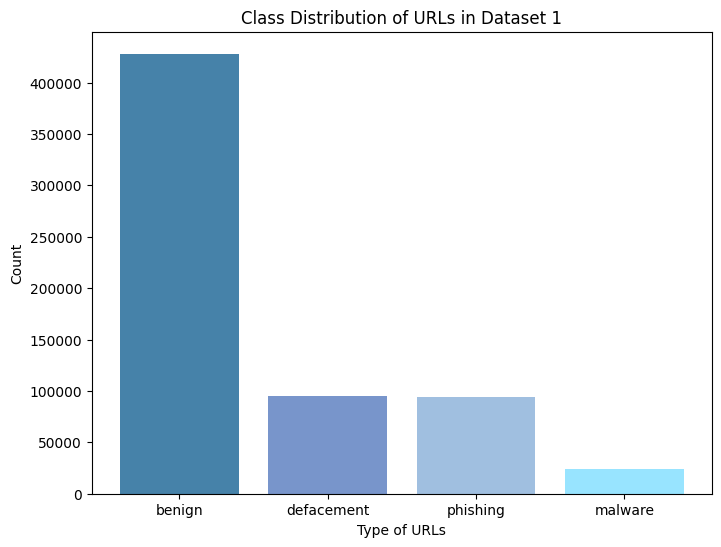

In [57]:
# Bar chart for Dataset 1

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_distribution_1.index, class_distribution_1.values, color=['#4682A9', '#7895CB', '#A0BFE0' ,'#98E4FF'])
plt.xticks(class_distribution_1.index)
plt.xlabel('Type of URLs')
plt.ylabel('Count')
plt.title('Class Distribution of URLs in Dataset 1')
plt.savefig('class_urls_dataset1.png')
plt.show()

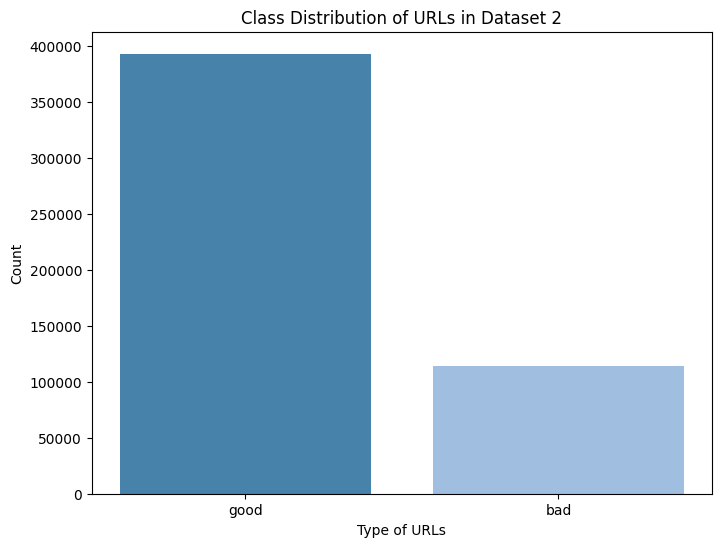

In [58]:
# Bar chart for Dataset 2

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_distribution_2.index, class_distribution_2.values, color=['#4682A9', '#A0BFE0'])
plt.xticks(class_distribution_2.index)
plt.xlabel('Type of URLs')
plt.ylabel('Count')
plt.title('Class Distribution of URLs in Dataset 2')
plt.savefig('class_urls_dataset2.png')
plt.show()

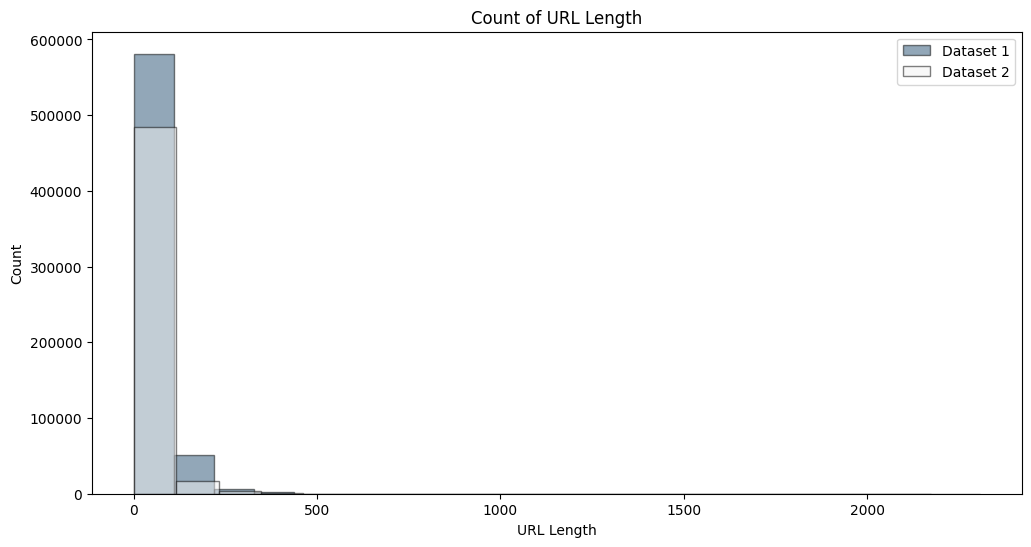

In [61]:
# Count of the url_Length

# Create histograms for both datasets with transparency
plt.figure(figsize=(12, 6))

# Histogram for Dataset 1
plt.hist(data1['url_length'], bins=20, color='#265073', edgecolor='black', alpha=0.5, label='Dataset 1')

# Histogram for Dataset 2
plt.hist(data2['url_length'], bins=20, color='#F3F3F3', edgecolor='black', alpha=0.5, label='Dataset 2')

plt.title('Count of URL Length')
plt.xlabel('URL Length')
plt.ylabel('Count')
plt.legend()  

plt.savefig('url_length_both_dataset.png')

# Display the histogram
plt.show()

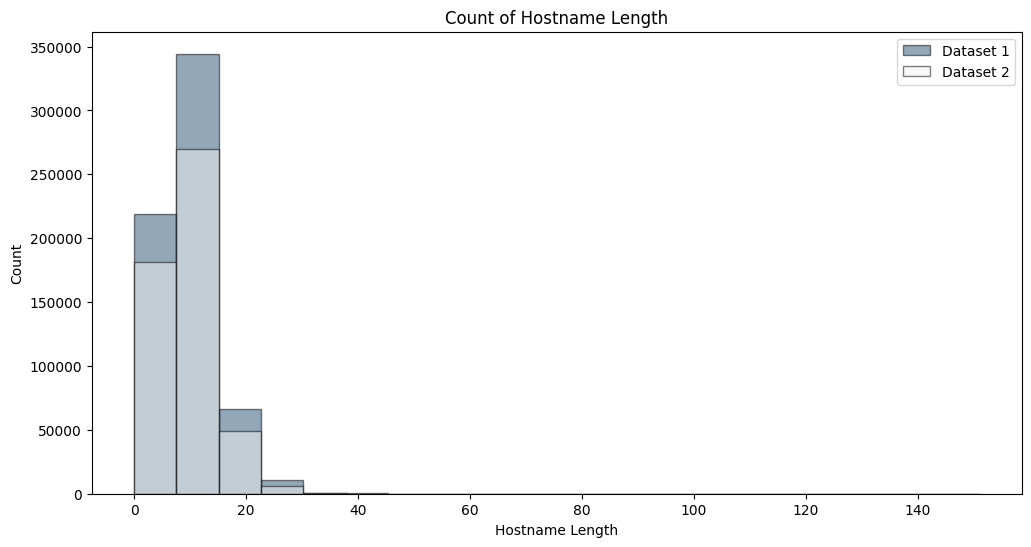

In [62]:
# Count of the hostname_length

# Create histograms for both datasets with transparency
plt.figure(figsize=(12, 6))

# Histogram for Dataset 1
plt.hist(data1['hostname_length'], bins=20, color='#265073', edgecolor='black', alpha=0.5, label='Dataset 1')

# Histogram for Dataset 2
plt.hist(data2['hostname_length'], bins=20, color='#F3F3F3', edgecolor='black', alpha=0.5, label='Dataset 2')

plt.title('Count of Hostname Length')
plt.xlabel('Hostname Length')
plt.ylabel('Count')
plt.legend()  

plt.savefig('hostname_length_both_dataset.png')

# Display the histogram
plt.show()

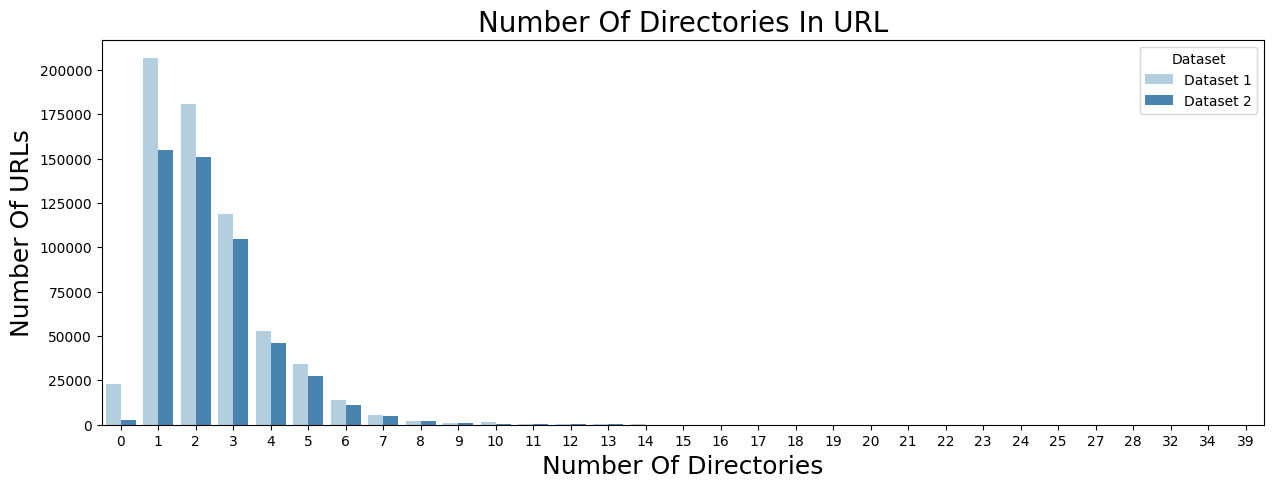

In [63]:
# Number of directories in URL

# Make copy for the datasets
data_copy_1 = data1.copy()
data_copy_2 = data2.copy()

# Add a 'dataset' column to distinguish between Dataset 1 and Dataset 2
data_copy_1['dataset'] = 'Dataset 1'
data_copy_2['dataset'] = 'Dataset 2'

# Combine Dataset 1 and Dataset 2
combined_data = pd.concat([data_copy_1, data_copy_2])

# Create a stacked bar chart
plt.figure(figsize=(15, 5))
plt.title("Number Of Directories In URL", fontsize=20)
sns.countplot(x='count_dir', data=combined_data, hue='dataset', palette="Blues")
plt.xlabel("Number Of Directories", fontsize=18)
plt.ylabel("Number Of URLs", fontsize=18)
plt.legend(title='Dataset')

plt.savefig('num_directories_both_dataset.png')

# Show the plot
plt.show()

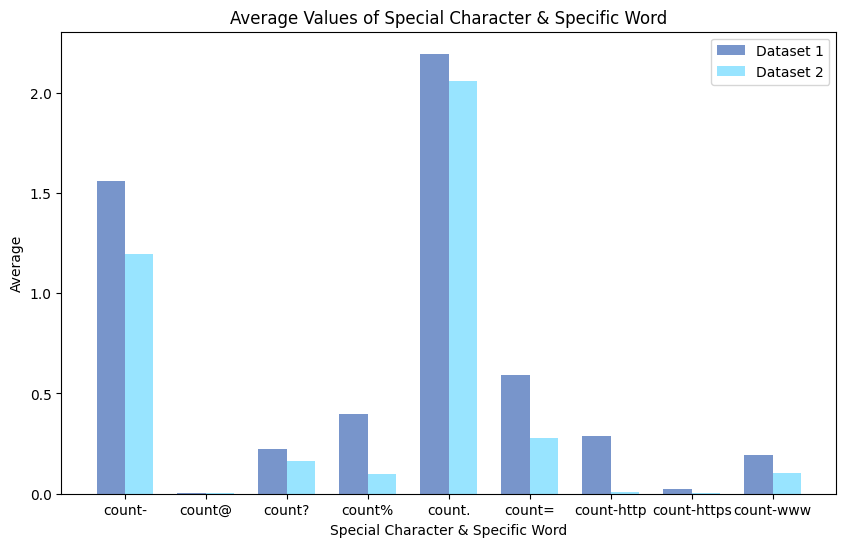

In [64]:
# Average of all special character

# List of variable names
variable_names = ['count-', 'count@', 'count?', 'count%', 'count.', 'count=', 'count-http', 'count-https', 'count-www']

# Calculate the average of each variable
averages_1 = data1[variable_names].mean()
averages_2 = data2[variable_names].mean()

# Create a bar chart with different colors for each dataset
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(variable_names))

bar1 = plt.bar(index - bar_width/2, averages_1, bar_width, label='Dataset 1', color='#7895CB')
bar2 = plt.bar(index + bar_width/2, averages_2, bar_width, label='Dataset 2', color='#98E4FF')

plt.title('Average Values of Special Character & Specific Word')
plt.xlabel('Special Character & Specific Word')
plt.ylabel('Average')
plt.xticks(index, variable_names)  

plt.legend()

plt.savefig('special_char_word_both_dataset.png')

# Show the chart
plt.show()

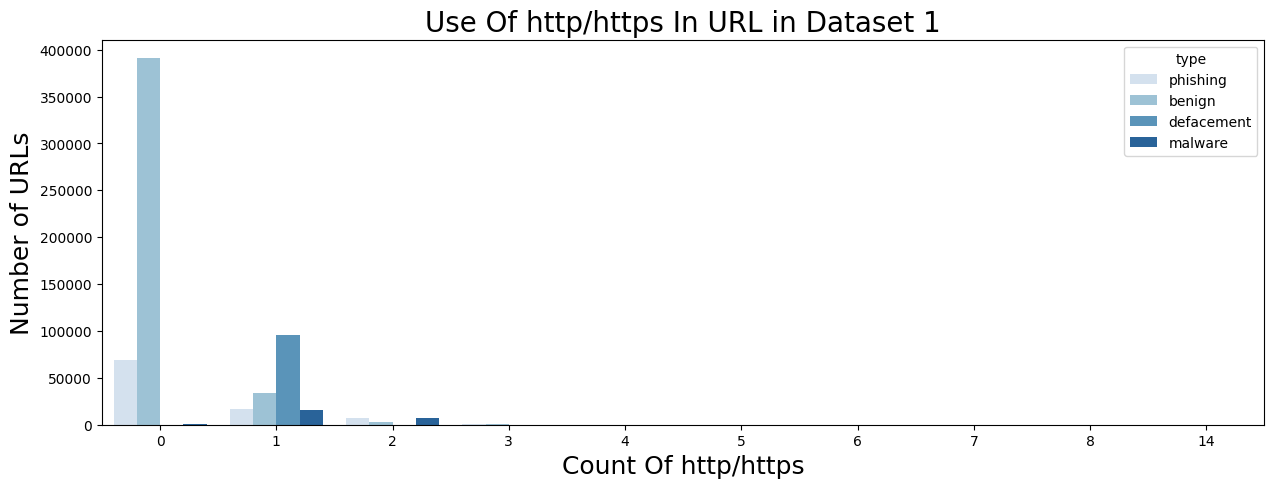

In [66]:
# Check use of http/https in URLs versus types of URLs

# Make copy for the datasets
data_copy_1 = data1.copy()
data_copy_2 = data2.copy()

# Combine count-http and count-https
data_copy_1['http_https_count'] = data_copy_1['count-http'] + data_copy_1['count-https']

# Update the 'type' column
data_copy_1['type'] = data_copy_1['type'].map({0: 'benign', 1: 'defacement', 2: 'phishing', 3: 'malware'})

# Create the figure and axes
plt.figure(figsize=(15, 5))
plt.title("Use Of http/https In URL in Dataset 1", fontsize=20)

# Create the countplot with the updated data
sns.countplot(data=data_copy_1, x='http_https_count', hue='type', palette='Blues')
plt.ylabel("Number of URLs", fontsize=18)
plt.xlabel("Count Of http/https", fontsize=18)

# Save the chart as a PNG file
plt.savefig('http_https_dataset1.png')

# Show the chart
plt.show()

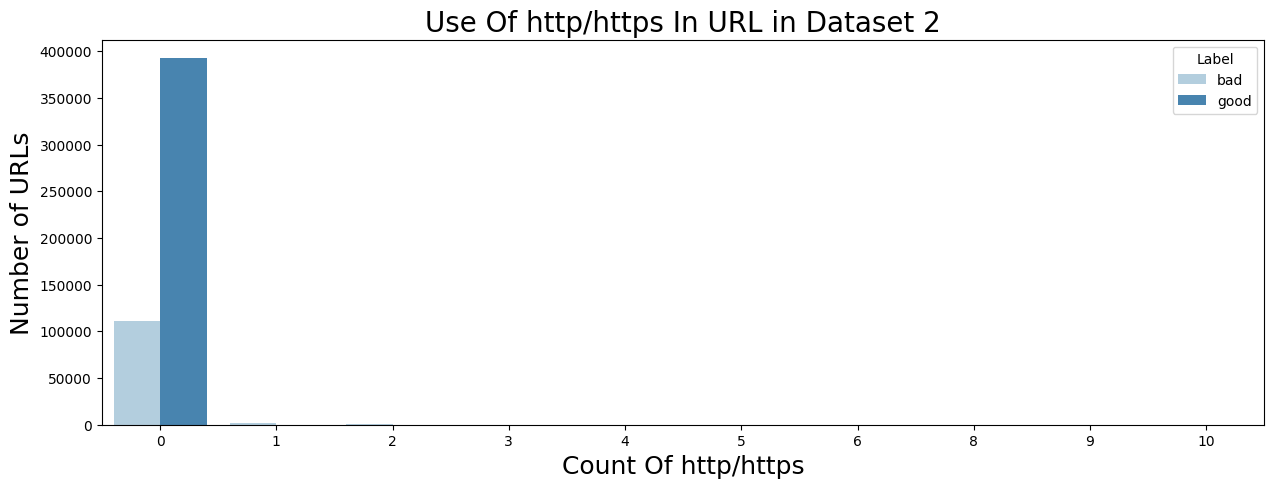

In [67]:
# Combine count-http and count-https
data_copy_2['http_https_count'] = data_copy_2['count-http'] + data_copy_2['count-https']

# Update the 'type' column
data_copy_2['Label'] = data_copy_2['Label'].map({0: 'good', 1: 'bad'})

# Create the figure and axes
plt.figure(figsize=(15, 5))
plt.title("Use Of http/https In URL in Dataset 2", fontsize=20)

# Create the countplot with the updated data
sns.countplot(data=data_copy_2, x='http_https_count', hue='Label', palette='Blues')
plt.ylabel("Number of URLs", fontsize=18)
plt.xlabel("Count Of http/https", fontsize=18)

plt.savefig('http_https_dataset2.png')

# Show the chart
plt.show()

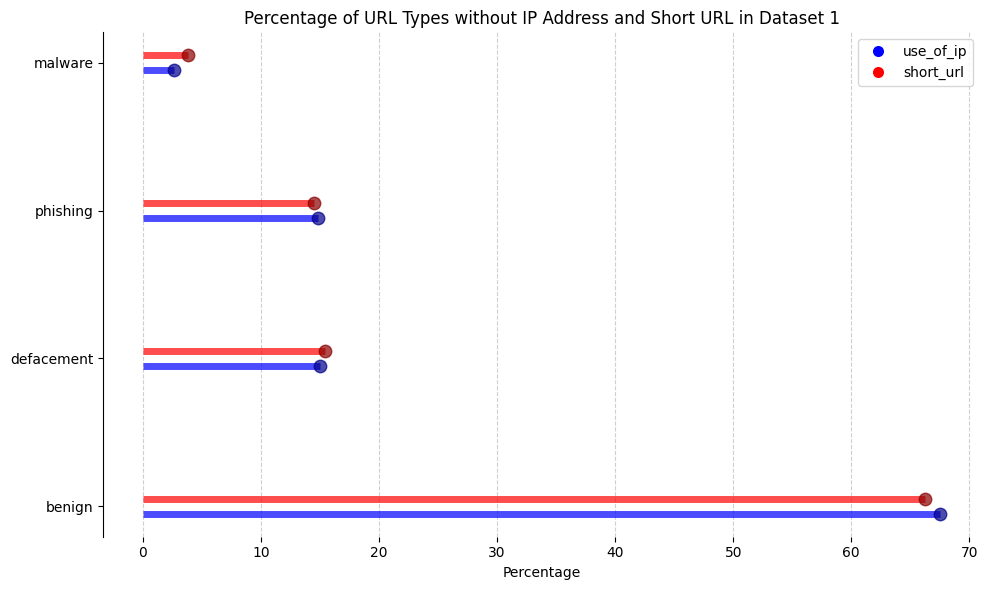

In [68]:
# Filter the data based on "use_of_ip" equal to -1 and "short_url" equal to 1
filtered_data_ip = data_copy_1[data_copy_1['use_of_ip'] == 1]
filtered_data_short_url = data_copy_1[data_copy_1['short_url'] == 1]

# Calculate the percentage of each URL type for "use_of_ip" feature
url_type_counts_ip = filtered_data_ip['type'].value_counts()
total_count_ip = len(filtered_data_ip)
url_type_percentages_ip = (url_type_counts_ip / total_count_ip) * 100

# Calculate the percentage of each URL type for "short_url" feature
url_type_counts_short_url = filtered_data_short_url['type'].value_counts()
total_count_short_url = len(filtered_data_short_url)
url_type_percentages_short_url = (url_type_counts_short_url / total_count_short_url) * 100

# Mapping of 'type' values to labels
label_mapping = {0: 'benign', 1: 'defacement', 2: 'phishing', 3: 'malware'}

# Create the 'labels' variable for both features
labels = [label_mapping[type_id] for type_id in range(4)]

# Specify colors for the lollipop points for both features
colors = ['blue', 'red']

# Create a lollipop chart
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate positions for lollipops
positions = np.arange(len(labels))
width = 0.05  # Reduced width of the lollipops

# Plot lollipops for "use_of_ip" feature
for i, percentage in enumerate(url_type_percentages_ip):
    if percentage > 0:
        ax.hlines(y=positions[i] - width, xmin=0, xmax=percentage, color='blue', alpha=0.7, linewidth=5, label='use_of_ip')
        ax.plot(percentage, positions[i] - width, "o", markersize=9, color='darkblue', alpha=0.7)

# Plot lollipops for "short_url" feature
for i, percentage in enumerate(url_type_percentages_short_url):
    if percentage > 0:
        ax.hlines(y=positions[i] + width, xmin=0, xmax=percentage, color='red', alpha=0.7, linewidth=5, label='short_url')
        ax.plot(percentage, positions[i] + width, "o", markersize=9, color='darkred', alpha=0.7)

# Set labels and title
ax.set_xlabel("Percentage")
ax.set_title("Percentage of URL Types without IP Address and Short URL in Dataset 1")

# Adjust the y-axis ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(labels)

# Create separate legend entries
legend1 = plt.Line2D([0], [0], marker='o', color='w', label='use_of_ip', markersize=9, markerfacecolor='blue')
legend2 = plt.Line2D([0], [0], marker='o', color='w', label='short_url', markersize=9, markerfacecolor='red')

# Add legends
ax.legend(handles=[legend1, legend2], loc='upper right')

# Remove the x-axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the lollipop chart
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('withoutIP_shortURL_dataset1.png')
plt.show()

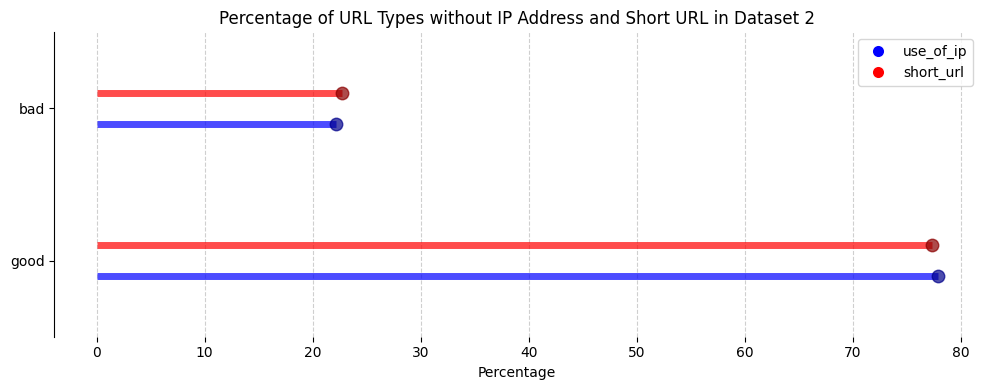

In [69]:
# Filter the data based on "use_of_ip" equal to -1 and "short_url" equal to 1
filtered_data_ip = data_copy_2[data_copy_2['use_of_ip'] == 1]
filtered_data_short_url = data_copy_2[data_copy_2['short_url'] == 1]

# Calculate the percentage of each URL type for "use_of_ip" feature
url_type_counts_ip = filtered_data_ip['Label'].value_counts()
total_count_ip = len(filtered_data_ip)
url_type_percentages_ip = (url_type_counts_ip / total_count_ip) * 100

# Calculate the percentage of each URL type for "short_url" feature
url_type_counts_short_url = filtered_data_short_url['Label'].value_counts()
total_count_short_url = len(filtered_data_short_url)
url_type_percentages_short_url = (url_type_counts_short_url / total_count_short_url) * 100

# Mapping of 'type' values to labels
label_mapping = {0: 'good', 1: 'bad'}

# Create the 'labels' variable for both features
labels = [label_mapping[type_id] for type_id in range(2)]

# Specify colors for the lollipop points for both features
colors = ['blue', 'red']

# Create a lollipop chart
fig, ax = plt.subplots(figsize=(10, 4))  # Shorter y-axis

# Calculate positions for lollipops
positions = np.array([0, 1])
width = 0.2  # Reduced width of the lollipops

# Plot lollipops for "use_of_ip" feature
for i, percentage in enumerate(url_type_percentages_ip):
    if percentage > 0:
        ax.hlines(y=positions[i] - width/2, xmin=0, xmax=percentage, color='blue', alpha=0.7, linewidth=5, label='use_of_ip')
        ax.plot(percentage, positions[i] - width/2, "o", markersize=9, color='darkblue', alpha=0.7)

# Plot lollipops for "short_url" feature
for i, percentage in enumerate(url_type_percentages_short_url):
    if percentage > 0:
        ax.hlines(y=positions[i] + width/2, xmin=0, xmax=percentage, color='red', alpha=0.7, linewidth=5, label='short_url')
        ax.plot(percentage, positions[i] + width/2, "o", markersize=9, color='darkred', alpha=0.7)

# Set labels and title
ax.set_xlabel("Percentage")
ax.set_title("Percentage of URL Types without IP Address and Short URL in Dataset 2")

# Set y-axis limits to bring classes closer
ax.set_ylim([-0.5, 1.5])

# Adjust the y-axis ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(labels)

# Create separate legend entries
legend1 = plt.Line2D([0], [0], marker='o', color='w', label='use_of_ip', markersize=9, markerfacecolor='blue')
legend2 = plt.Line2D([0], [0], marker='o', color='w', label='short_url', markersize=9, markerfacecolor='red')

# Add legends
ax.legend(handles=[legend1, legend2], loc='upper right')

# Remove the x-axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the lollipop chart
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('withoutIP_shortURL_dataset2.png')
plt.show()

Correlation Analysis 

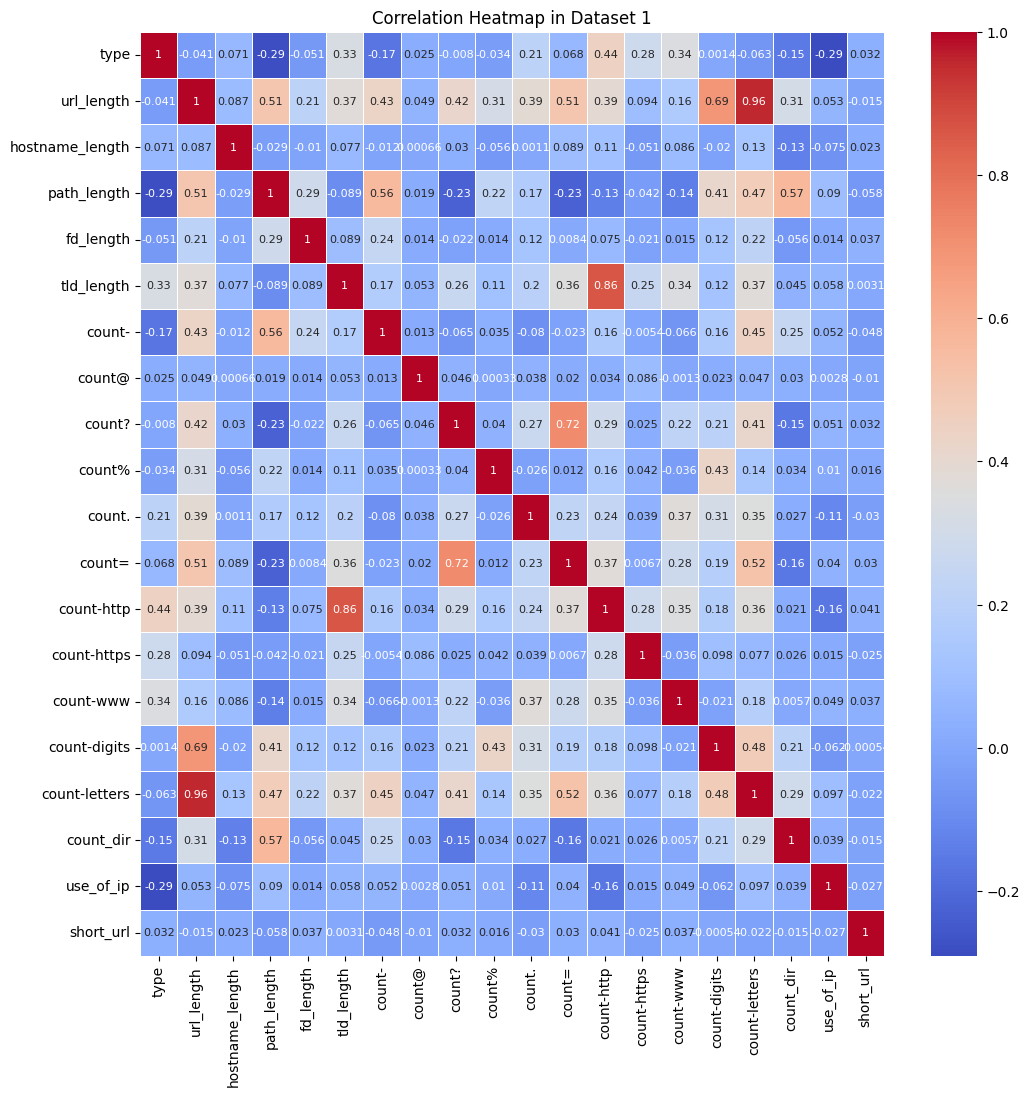

In [70]:
# Make copy for Dataset 1
data_copy_1 = data1.copy()
heatmap_data_1 = data_copy_1.drop("url", axis=1)

# Create a correlation matrix
correlation_matrix_1 = heatmap_data_1.corr()

# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix_1, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap in Dataset 1')

# Save the heatmap as a PNG file
plt.savefig('correlation_heatmap_dataset1.png')

# Display the heatmap
plt.show()

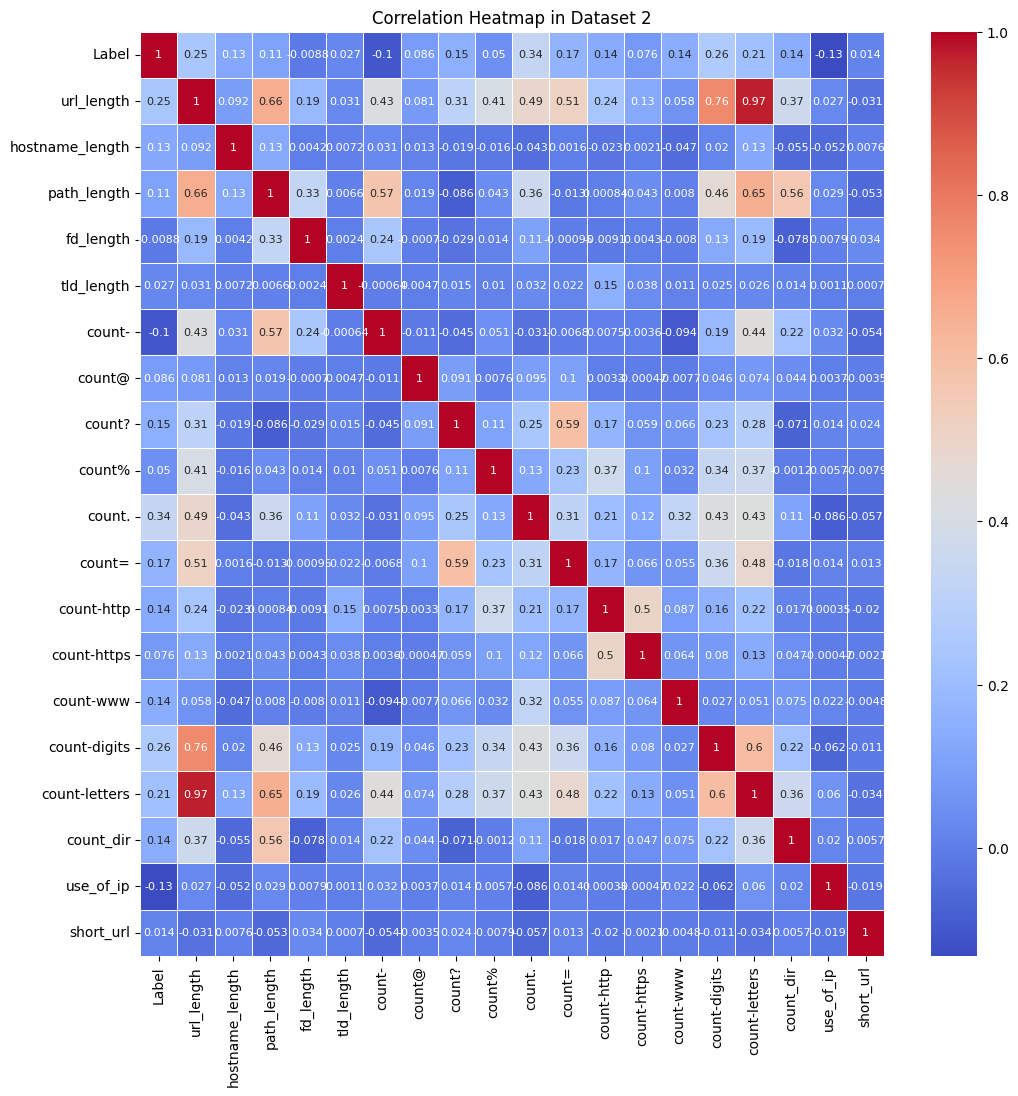

In [71]:
# Make copy for Dataset 2
data_copy_2 = data2.copy()
heatmap_data_2 = data_copy_2.drop("URL", axis=1)

# Create a correlation matrix
correlation_matrix_2 = heatmap_data_2.corr()

# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix_2, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap in Dataset 2')

# Save the heatmap as a PNG file
plt.savefig('correlation_heatmap_dataset2.png')

# Display the heatmap
plt.show()